In [2]:
# Importing Libraries
import tensorflow as tf
import os
import numpy as np
import sys
import random
import cv2
import glob
import matplotlib.pyplot as plt
import xlrd
import tensorflow.keras.backend as K

from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize

In [3]:
seed = 42
np.random.seed = seed

In [4]:
# Input Image Dimensions
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

In [5]:
# Extracting the label data from excel sheet
path = ('dataset/CamVid/class_dict.xlsx')

labelNames = []
rgbColorCodes = []
wb = xlrd.open_workbook(path) 
sheet = wb.sheet_by_index(0) 
sheet.cell_value(0, 0) 
  
for i in range(1, sheet.nrows): 
    labelNames.append(sheet.cell_value(i, 0)) 
# print(len(labelNames))

for i in range(1, sheet.nrows):
    rgbColorCodes.append((int(sheet.cell_value(i, 1)), int(sheet.cell_value(i, 2)), int(sheet.cell_value(i, 3))))
# print(len(rgbColorCodes))

# Storing label names and corresponding RGB values in dictionaries 
labelID = {i:j for i,j in enumerate(labelNames)}
rgbColorID = {i:j for i,j in enumerate(rgbColorCodes)}

print(labelID)
print(rgbColorID)

{0: 'Animal', 1: 'Archway', 2: 'Bicyclist', 3: 'Bridge', 4: 'Building', 5: 'Car', 6: 'CartLuggagePram', 7: 'Child', 8: 'Column_Pole', 9: 'Fence', 10: 'LaneMkgsDriv', 11: 'LaneMkgsNonDriv', 12: 'Misc_Text', 13: 'MotorcycleScooter', 14: 'OtherMoving', 15: 'ParkingBlock', 16: 'Pedestrian', 17: 'Road', 18: 'RoadShoulder', 19: 'Sidewalk', 20: 'SignSymbol', 21: 'Sky', 22: 'SUVPickupTruck', 23: 'TrafficCone', 24: 'TrafficLight', 25: 'Train', 26: 'Tree', 27: 'Truck_Bus', 28: 'Tunnel', 29: 'VegetationMisc', 30: 'Void', 31: 'Wall'}
{0: (64, 128, 64), 1: (192, 0, 128), 2: (0, 128, 192), 3: (0, 128, 64), 4: (128, 0, 0), 5: (64, 0, 128), 6: (64, 0, 192), 7: (192, 128, 64), 8: (192, 192, 128), 9: (64, 64, 128), 10: (128, 0, 192), 11: (192, 0, 64), 12: (128, 128, 64), 13: (192, 0, 192), 14: (128, 64, 64), 15: (64, 192, 128), 16: (64, 64, 0), 17: (128, 64, 128), 18: (128, 128, 192), 19: (0, 0, 192), 20: (192, 128, 128), 21: (128, 128, 128), 22: (64, 128, 192), 23: (0, 0, 64), 24: (0, 64, 64), 25: (192

In [6]:
def rgb_to_onehot(rgb_image, colormap):
    '''Function to one hot encode RGB mask labels
        Inputs: 
            rgb_image - image matrix (eg. 256 x 256 x 3 dimension numpy ndarray)
            colormap - dictionary of color to label id
        Output: One hot encoded image of dimensions (height x width x num_classes) where num_classes = len(colormap)
    '''
    num_classes = len(colormap)
#     print(num_classes)
    shape = rgb_image.shape[:2]+(num_classes,)
#     print(type(shape))
    encoded_image = np.zeros( shape, dtype=np.int8 )
    for i, cls in enumerate(colormap):
        encoded_image[:,:,i] = np.all(rgb_image.reshape( (-1,3) ) == colormap[i], axis=1).reshape(shape[:2])
    return encoded_image



In [7]:
# Processing training datasets
processing = False
X_train = []
Y_train = []
Y_trainRGB = []

count = 0
if processing:
    print('Resizing training images')
    for filename in glob.glob('dataset/CamVid/train/*.png'):
        img = cv2.imread(filename)
        img = cv2.resize(img, (IMG_WIDTH,IMG_HEIGHT), interpolation = cv2.INTER_AREA)
        height, width, layers = img.shape
        
        if count == 0:
            print(height, width, layers)
            print(type(img))
        count += 1
        size = (width,height)
        X_train.append(img)
        print(count)
    print('Training Data resizing Finished')
    
    
    print('Resizing training masks')
    count = 0
    for filename in glob.glob('dataset/CamVid/train_labels/*.png'):
        img = imread(filename)
        img = resize(img, (IMG_HEIGHT, IMG_HEIGHT), mode='constant', preserve_range=True)
        Y_trainRGB.append(img)
        img = rgb_to_onehot(img, rgbColorID)
        count += 1
        Y_train.append(img)
        print(count)
    print('Training Mask resizing Finished')

    
    X_train = np.array(X_train, dtype='uint8')
    print(type(X_train))
    np.save('NPY files/trainingNPYfiles/MultiClassTrainingData', X_train)
    
    Y_train = np.array(Y_train, dtype='uint8')
    print(type(Y_train))
    np.save('NPY files/trainingNPYfiles/MultiClassMasks', Y_train)
    
    Y_trainRGB = np.array(Y_trainRGB, dtype='uint8')
    print(type(Y_trainRGB))
    np.save('NPY files/trainingNPYfiles/MultiClassMasksRGB', Y_trainRGB)

else:
    print('Input image already processed. Modify processing parameter to False to process input images again.')
    
    

Input image already processed. Modify processing parameter to False to process input images again.


In [8]:
# Processing Validation datasets
processing = False
X_val = []
Y_val = []
Y_valRGB = []

count = 0
if processing:
    print('Resizing validation images')
    for filename in glob.glob('dataset/CamVid/val/*.png'):
        img = cv2.imread(filename)
        img = cv2.resize(img, (IMG_WIDTH,IMG_HEIGHT), interpolation = cv2.INTER_AREA)
        height, width, layers = img.shape
        
        if count == 0:
            print(height, width, layers)
            print(type(img))
        count += 1
        size = (width,height)
        X_val.append(img)
        print(count)
    print('Validation Data resizing Finished')
    
    
    print('Resizing Validation masks')
    count = 0
    for filename in glob.glob('dataset/CamVid/val_labels/*.png'):
        img = imread(filename)
        img = resize(img, (IMG_HEIGHT, IMG_HEIGHT), mode='constant', preserve_range=True)
        Y_valRGB.append(img)
        img = rgb_to_onehot(img, rgbColorID)
        count += 1
        Y_val.append(img)
        print(count)
    print('Validtion Mask resizing Finished')

    
    X_val = np.array(X_val, dtype='uint8')
    print(type(X_val))
    np.save('NPY files/valNPYfiles/MultiClassValData', X_val)
    
    Y_val = np.array(Y_val, dtype='uint8')
    print(type(Y_val))
    np.save('NPY files/valNPYfiles/MultiClassValMasks', Y_val)
    
    Y_valRGB = np.array(Y_valRGB, dtype='uint8')
    print(type(Y_valRGB))
    np.save('NPY files/valNPYfiles/MultiClassValMasksRGB', Y_valRGB)

else:
    print('Input image already processed. Modify processing parameter to False to process input images again.')
    

Input image already processed. Modify processing parameter to False to process input images again.


In [9]:
X_train = np.load('NPY files/trainingNPYfiles/MultiClassTrainingData.npy')

Y_train = np.load('NPY files/trainingNPYfiles/MultiClassMasks.npy')

Y_trainRGB = np.load('NPY files/trainingNPYfiles/MultiClassMasksRGB.npy')

X_val = np.load('NPY files/valNPYfiles/MultiClassValData.npy')

Y_val = np.load('NPY files/valNPYfiles/MultiClassValMasks.npy')

Y_valRGB = np.load('NPY files/valNPYfiles/MultiClassValMasksRGB.npy')

In [10]:
# Processing testing datasets
processTest = False
count = 0
X_test = []
Y_test = []
if processTest:
    print('Resizing testing images')

    for filename in glob.glob('dataset/CamVid/test/*.png'):
        img = cv2.imread(filename)
        img = cv2.resize(img, (IMG_WIDTH,IMG_HEIGHT), interpolation = cv2.INTER_AREA)
        height, width, layers = img.shape
        
        if count == 0:
            print(height, width, layers)
            print(type(img))
        count += 1
        size = (width,height)
        X_test.append(img)
        print(count)
    print('Testing Data resizing Finished')
    
    print('Resizing Testing masks')
    count = 0
    for filename in glob.glob('dataset/CamVid/test_labels/*.png'):
        img = imread(filename)
        img = resize(img, (IMG_HEIGHT, IMG_HEIGHT), mode='constant', preserve_range=True)
        count += 1
        Y_test.append(img)
        print(count)
    print('Testing Mask resizing Finished')
    
    # This is done to avoid redundant processing
    X_test = np.array(X_test, dtype='uint8')
    print(type(X_test))
    np.save('NPY files/testingNPYfiles/MultiClassTestingData', X_test)
    
    Y_test = np.array(Y_test, dtype='uint8')
    print(type(Y_test))
    np.save('NPY files/testingNPYfiles/MultiClassTestingMasks', Y_test)
    
else:
    print('Testing images already processed. Modify processTest parameter to False to process testing images again.')

Testing images already processed. Modify processTest parameter to False to process testing images again.


In [11]:
# Building the U-net model
inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)) # Defining the input layer
s = tf.keras.layers.Lambda(lambda x: x/255)(inputs) # Converting input pixels to floating values

c1 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1) # To prevent neural net from over fitting
c1 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)

c2 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2) # To prevent neural net from over fitting
c2 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)

c3 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3) # To prevent neural net from over fitting
c3 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)

c4 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4) # To prevent neural net from over fitting
c4 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)

c5 = tf.keras.layers.Conv2D(512, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5) # To prevent neural net from over fitting
c5 = tf.keras.layers.Conv2D(512, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
p5 = tf.keras.layers.MaxPooling2D((2,2))(c5)

c6 = tf.keras.layers.Conv2D(1024, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p5)
c6 = tf.keras.layers.Dropout(0.3)(c6) # To prevent neural net from over fitting
c6 = tf.keras.layers.Conv2D(1024, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

# Decoding the layers
u7 = tf.keras.layers.Conv2DTranspose(512, (2,2), strides=(2,2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c5])
c7 = tf.keras.layers.Conv2D(512, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7) # To prevent neural net from over fitting
c7 = tf.keras.layers.Conv2D(512, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(256, (2,2), strides=(2,2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c4])
c8 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.2)(c8) # To prevent neural net from over fitting
c8 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c3])
c9 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9) # To prevent neural net from over fitting
c9 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

u10 = tf.keras.layers.Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c9)
u10 = tf.keras.layers.concatenate([u10, c2])
c10 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u10)
c10 = tf.keras.layers.Dropout(0.1)(c10) # To prevent neural net from over fitting
c10 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c10)

u11 = tf.keras.layers.Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c10)
u11 = tf.keras.layers.concatenate([u11, c1], axis=3)
c11 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u11)
c11 = tf.keras.layers.Dropout(0.1)(c11) # To prevent neural net from over fitting
c11 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c11)

outputs = tf.keras.layers.Conv2D(32, (1,1), activation='softmax', padding='same')(c11)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 896         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 32) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [12]:
# Model Checkpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
             tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
             tf.keras.callbacks.TensorBoard(log_dir='logs')]


In [13]:
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=5, epochs=100,callbacks=callbacks)

Train on 332 samples, validate on 37 samples
Epoch 1/100
332/332 [==============================] - 64s 192ms/sample - loss: 1.8937 - accuracy: 0.2025 - val_loss: 1.2876 - val_accuracy: 0.3797
Epoch 2/100
332/332 [==============================] - 48s 144ms/sample - loss: 1.1680 - accuracy: 0.4064 - val_loss: 0.7587 - val_accuracy: 0.5337
Epoch 3/100
332/332 [==============================] - 48s 145ms/sample - loss: 0.7883 - accuracy: 0.5236 - val_loss: 0.8931 - val_accuracy: 0.4845
Epoch 4/100
332/332 [==============================] - 46s 140ms/sample - loss: 0.7123 - accuracy: 0.5390 - val_loss: 0.5358 - val_accuracy: 0.6030
Epoch 5/100
332/332 [==============================] - 46s 139ms/sample - loss: 0.6495 - accuracy: 0.5577 - val_loss: 0.6115 - val_accuracy: 0.5790
Epoch 6/100
332/332 [==============================] - 48s 146ms/sample - loss: 0.6424 - accuracy: 0.5592 - val_loss: 0.5367 - val_accuracy: 0.5718


In [14]:
X_test = np.load('NPY files/testingNPYfiles/MultiClassTestingData.npy')

Y_test = np.load('NPY files/testingNPYfiles/MultiClassTestingMasks.npy')

In [15]:
preds_test = model.predict(X_test, verbose=1)
print(preds_test.shape)
preds_train = model.predict(X_train, verbose=1)
preds_val = model.predict(X_val, verbose=1)

232/232 [==============================] - 22s 93ms/sample
(232, 256, 256, 32)
 32/369 [=>............................] - ETA: 16s

MemoryError: Unable to allocate 2.88 GiB for an array with shape (369, 256, 256, 32) and data type float32

In [16]:
def onehot_to_rgb(onehot, colormap):
    '''Function to decode encoded mask labels
        Inputs: 
            onehot - one hot encoded image matrix (height x width x num_classes)
            colormap - dictionary of color to label id
        Output: Decoded RGB image (height x width x 3) 
    '''
    single_layer = np.argmax(onehot, axis=-1)
    output = np.zeros( onehot.shape[:2]+(3,) )
    for k in colormap.keys():
        output[single_layer==k] = colormap[k]
    return np.uint8(output)

preds_testRGB = []
for i in range(len(X_test)):
    preds_testRGB.append(onehot_to_rgb(preds_test[i], rgbColorID))
    
preds_valRGB = []
for i in range(len(X_val)):
    preds_valRGB.append(onehot_to_rgb(preds_val[i], rgbColorID))
    
preds_trainRGB = []
for i in range(len(X_train)):
    preds_trainRGB.append(onehot_to_rgb(preds_train[i], rgbColorID))


NameError: name 'preds_val' is not defined

In [20]:
preds_testRGB = np.array(preds_testRGB, dtype='uint8')
np.save('Output/MultiClassTestingDataOutput', preds_testRGB)

preds_valRGB = np.array(preds_valRGB, dtype='uint8')
np.save('Output/MultiClassValDataOutput', preds_valRGB)
    
preds_trainRGB = np.array(preds_trainRGB, dtype='uint8')
np.save('Output/MultiClassTrainingDataOutput', preds_trainRGB)


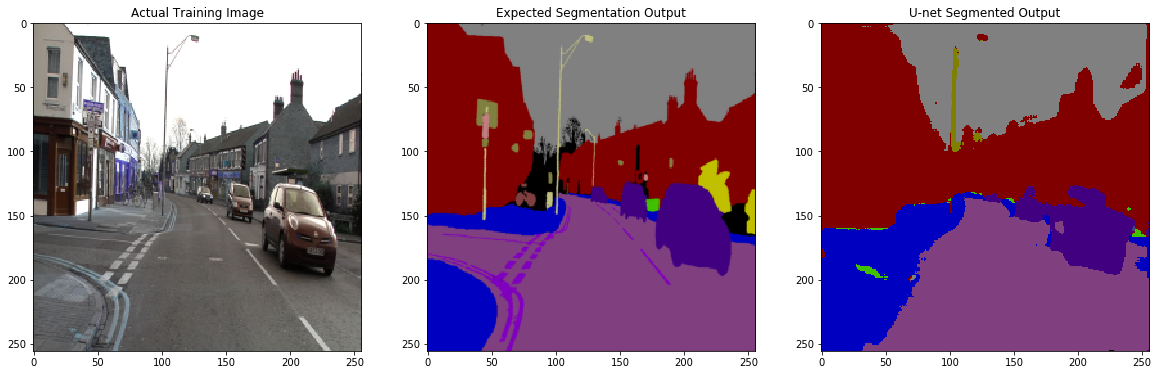

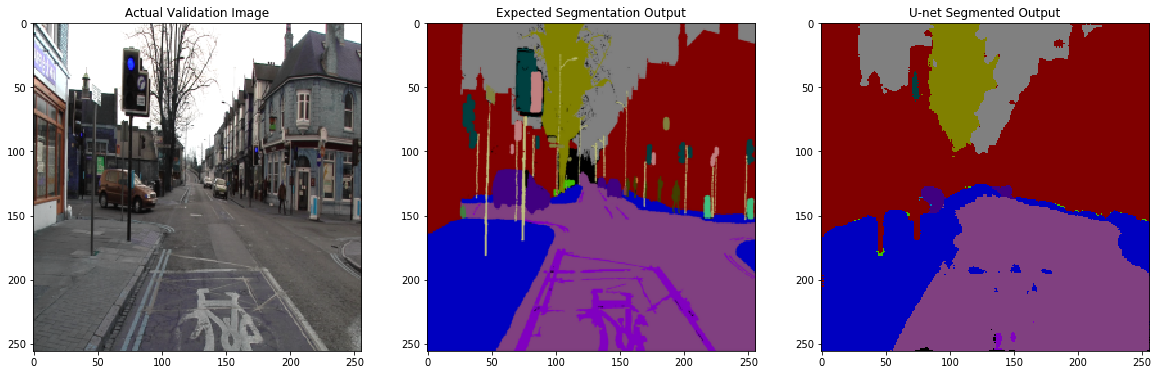

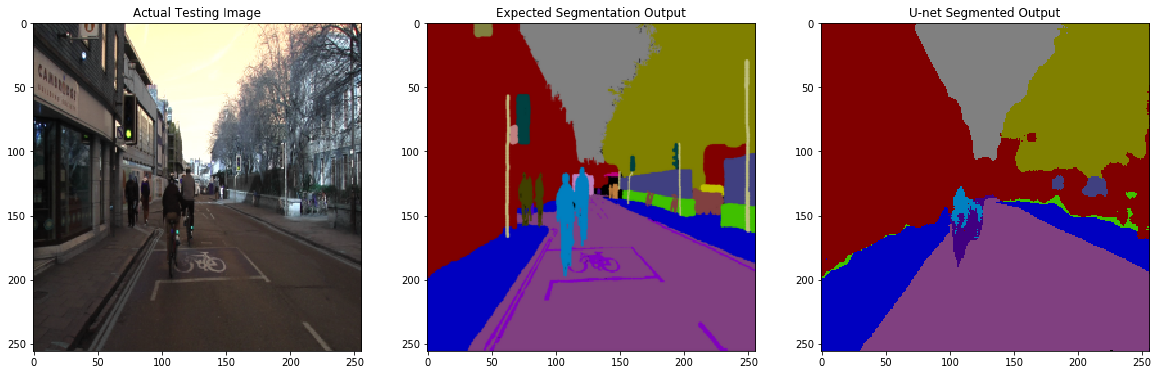

In [21]:
# Comparing the results

ix = random.randint(0, len(preds_trainRGB))
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(X_train[ix])
ax1.title.set_text('Actual Training Image')
ax2 = fig.add_subplot(1,3,2)
ax2.set_title('Expected Segmentation Output')
ax2.imshow(Y_trainRGB[ix])
ax3 = fig.add_subplot(1,3,3)
ax3.set_title('U-net Segmented Output')
ax3.imshow(preds_trainRGB[ix])


ix = random.randint(0, len(preds_valRGB))
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(X_val[ix])
ax1.title.set_text('Actual Validation Image')
ax2 = fig.add_subplot(1,3,2)
ax2.set_title('Expected Segmentation Output')
ax2.imshow(Y_valRGB[ix])
ax3 = fig.add_subplot(1,3,3)
ax3.set_title('U-net Segmented Output')
ax3.imshow(preds_valRGB[ix])


ix = random.randint(0, len(preds_testRGB))
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(X_test[ix])
ax1.title.set_text('Actual Testing Image')
ax2 = fig.add_subplot(1,3,2)
ax2.set_title('Expected Segmentation Output')
ax2.imshow(Y_test[ix])
ax3 = fig.add_subplot(1,3,3)
ax3.set_title('U-net Segmented Output')
ax3.imshow(preds_testRGB[ix])


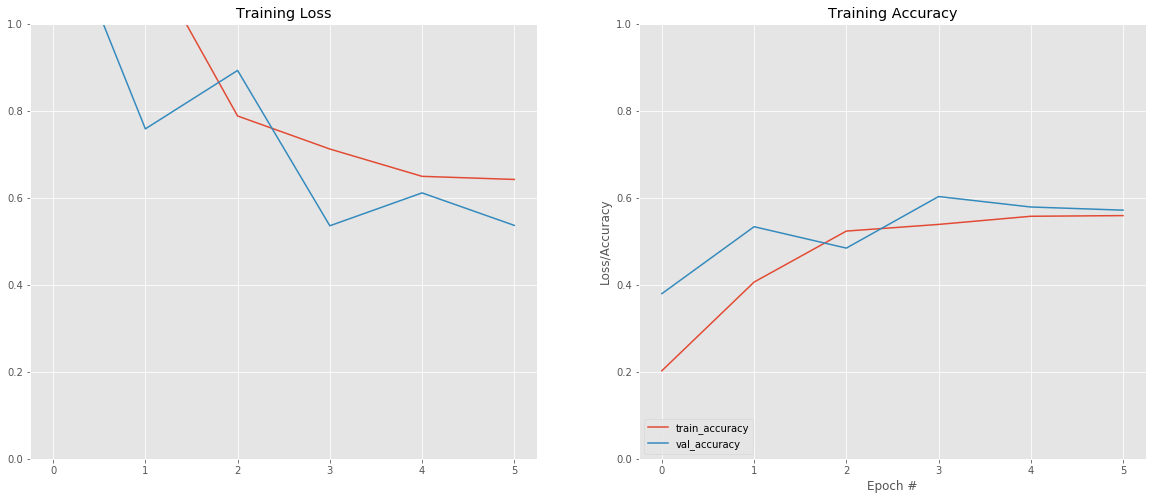

In [17]:
N = len(results.history['loss'])

#Plot the model evaluation history
plt.style.use("ggplot")
fig = plt.figure(figsize=(20,8))

fig.add_subplot(1,2,1)
plt.title("Training Loss")
plt.plot(np.arange(0, N), results.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), results.history["val_loss"], label="val_loss")
plt.ylim(0, 1)

fig.add_subplot(1,2,2)
plt.title("Training Accuracy")
plt.plot(np.arange(0, N), results.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, N), results.history["val_accuracy"], label="val_accuracy")
plt.ylim(0, 1)

plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [1]:
# Making a video out of input test images
make_video = False

if make_video:
      # This is done to individually compare the test output images with the test input images
#     for i in range(len(X_test)):
#         imshow(X_test[i])
#         plt.savefig('inputTestImages/input' + str(i) + '.jpg')
#         plt.show()
    
    out = cv2.VideoWriter('Output/video/inputVideo.avi',cv2.VideoWriter_fourcc(*'DIVX'), 0.8, (128, 128))

    for i in range(len(X_test)):
        out.write(X_test[i])
    out.release()

In [2]:
# Making a video out of output test images
make_video = False

if make_video:
    # Saving all the images in outputImages folder
    for i in range(len(preds_test_t)):
            imshow(np.squeeze(preds_test_t[i]))
            plt.savefig('Output/outputImages/output' + str(i) + '.jpg')
            plt.show()

    img_array = []
    for filename in glob.glob('Output/outputImages/*.jpg'):
        img = cv2.imread(filename)
        height, width, layers = img.shape
#         print(height, width, layers)
        size = (width,height)
        img_array.append(img)


    out = cv2.VideoWriter('Output/video/SegmentedOutput.avi',cv2.VideoWriter_fourcc(*'DIVX'), 0.8, (432,288))

    for i in range(len(img_array)):
        out.write(img_array[i])
    out.release()

In [ ]:
!tensorboard --logdir='logs/validation/' --host localhost --port 8099